In [142]:
%matplotlib inline
import matplotlib.style
import matplotlib as mpl
import os
from pylab import *

rcParams['font.size']=18
rcParams['figure.facecolor']='white'

from Tau_Decay_Pythia_Simulator import Tau_Decay_Simulator


In [143]:
TDS = Tau_Decay_Simulator()

Reading negativepolnew.txt
All possible daughters of the tau decay (within 10k decays): [16, -211, 211, 11, -12, 111, 13, -14, -311, -321, 130, 310, 22, 311, 221, 321, 223, -323]


0.05041337432806602
0.00464553432498


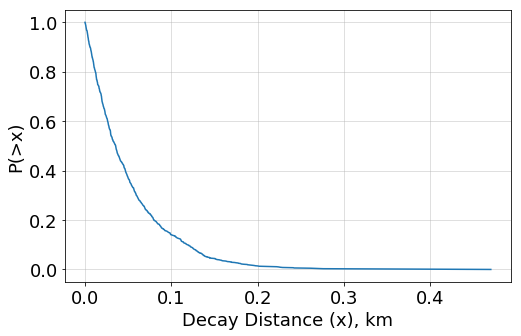

In [144]:
E_tau_eV = 1.e15
vals = TDS.sample_range(E_tau_eV, 1000)
print np.mean(vals)
u = (np.cumsum(np.ones(len(vals)))-1.) / (float(len(vals))-1.)
#hist(vals)
figure(figsize=(8,5))
plot(np.sort(vals), 1.-u)
grid(True, which='both', alpha=0.5)
xlabel('Decay Distance (x), km')
ylabel('P(>x)')

print TDS.sample_range(E_tau_eV, None)


In [145]:
shower_energy_fractions = TDS.sample_energy_fraction(num_events=100000)

(0, 1)

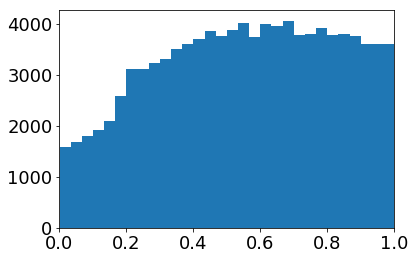

In [146]:
bins = (TDS.shower_energybins[:-1] + TDS.shower_energybins[1:])/2.
p = TDS.shower_frac
samps = np.random.choice(bins,100000, p=p)
ret = hist(samps,30)
plt.xlim(0,1)

Text(0.5,0,'Fraction of Tau Energy')

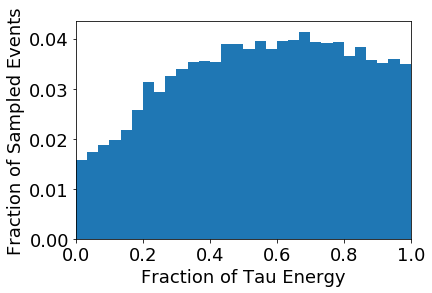

In [147]:
figure()
ret = hist(shower_energy_fractions,30,weights=np.ones(len(shower_energy_fractions))/float(len(shower_energy_fractions)))
plt.xlim(0,1)
plt.ylabel(r"Fraction of Sampled Events")
plt.xlabel(r"Fraction of Tau Energy")

In [148]:
hadron_energy_fractions = TDS.sample_energy_fraction(num_events=100000, type='hadron')

Text(0.5,0,'Fraction of Tau Energy')

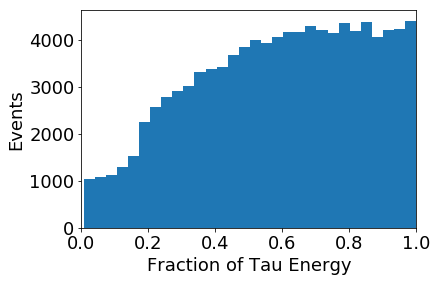

In [149]:
figure()
ret = hist(hadron_energy_fractions,30)
plt.xlim(0,1)
plt.ylabel(r"Events")
plt.xlabel(r"Fraction of Tau Energy")

In [150]:
em_energy_fractions = TDS.sample_energy_fraction(num_events=1000000, type='em')

Text(0.5,0,'Fraction of Tau Energy')

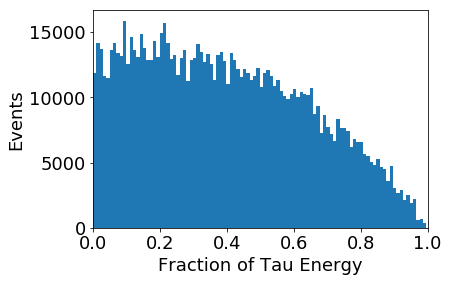

In [151]:
figure()
ret = hist(em_energy_fractions,100)
plt.xlim(0,1)
plt.ylabel(r"Events")
plt.xlabel(r"Fraction of Tau Energy")

In [152]:
TDS_n = Tau_Decay_Simulator(pol='negative')
TDS_p = Tau_Decay_Simulator(pol='positive')

Reading negativepolnew.txt
All possible daughters of the tau decay (within 10k decays): [16, -211, 211, 11, -12, 111, 13, -14, -311, -321, 130, 310, 22, 311, 221, 321, 223, -323]
Reading positivepolnew.txt
All possible daughters of the tau decay (within 10k decays): [16, -211, 211, 111, 11, -12, 13, -14, -321, -311, 321, 22, 310, 311, 130, 221, 223, -323]


In [153]:
neg_shower_energy_fractions = TDS_n.sample_energy_fraction(num_events=100000)
pos_shower_energy_fractions = TDS_p.sample_energy_fraction(num_events=100000)

neg_hadron_energy_fractions = TDS_n.sample_energy_fraction(type='hadron',num_events=100000)
pos_hadron_energy_fractions = TDS_p.sample_energy_fraction(type='hadron',num_events=100000)

neg_em_energy_fractions = TDS_n.sample_energy_fraction(type='em',num_events=100000)
pos_em_energy_fractions = TDS_p.sample_energy_fraction(type='em',num_events=100000)

0.003409999999999861
24.999999999999208


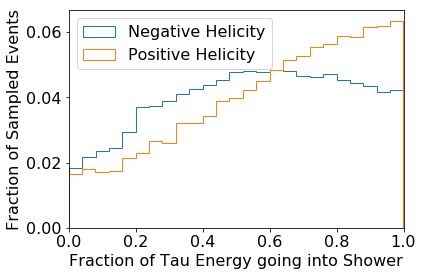

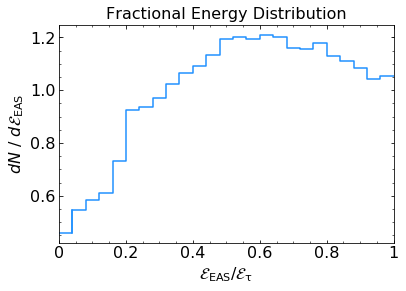

In [167]:
rcParams['font.size']=16
nbins = 25
figure(1)
n_n,b_n,p_n = hist(neg_shower_energy_fractions,nbins,histtype='step',label='Negative Helicity',
                  weights=np.ones(len(neg_shower_energy_fractions))/float(len(neg_shower_energy_fractions)))
n_p,b_p,p_p = hist(pos_shower_energy_fractions,nbins,histtype='step',label='Positive Helicity',
                  weights=np.ones(len(pos_shower_energy_fractions))/float(len(pos_shower_energy_fractions)))

plt.xlim(0,1)
plt.legend(loc='upper left')
plt.ylabel(r"Fraction of Sampled Events")
plt.xlabel(r"Fraction of Tau Energy going into Shower")
plt.title("")

figure(2)
plt.xlim(0,1)
binwidth=n_n[1]- n_n[0]
print binwidth
plt.step(b_n[1:], n_n*nbins, where='pre', color='dodgerblue', label='Negative Helicity')
plt.step(b_n[0:2], n_n[0:2]*nbins, where='post', color='dodgerblue', )
plt.title("Fractional Energy Distribution", fontsize=16)
plt.xlabel(r"$\mathcal{E}_{\mathrm{EAS}} / \mathcal{E}_{\mathrm{\tau}}$ ")
plt.ylabel(r"$ dN \ / \ d\mathcal{E}_\mathrm{EAS}$")
print(sum(n_n)*nbins)
#plt.ylim(0,1.05)
plt.minorticks_on()
plt.xticks(np.arange(0,1.2,0.2), ['0', '0.2','0.4', '0.6', '0.8', '1'])
#plt.yticks(np.arange(0,1.2,0.2), ['0', '0.2','0.4', '0.6', '0.8', '1'])
plt.tick_params(bottom=True, top=True, left=True, right=True, direction='in', which='both')
            
finame = os.environ['TAU_DIR'] + "/plots/pythia-energy-fraction.pdf"
plt.savefig(finame, bbox_inches='tight')

In [ ]:
rcParams['font.size']=14
figure()
ret = hist(neg_hadron_energy_fractions,25,histtype='step',label='Negative Helicity',
           weights=np.ones(len(neg_hadron_energy_fractions))/float(len(neg_hadron_energy_fractions)))
ret = hist(pos_hadron_energy_fractions,25,histtype='step',label='Positive Helicity',
           weights=np.ones(len(pos_hadron_energy_fractions))/float(len(pos_hadron_energy_fractions)))

plt.xlim(0,1)
plt.legend(loc='upper left')
plt.ylabel(r"Fraction of Sampled Events")
plt.xlabel(r"Fraction of Tau Energy going into Hadronic Shower")
plt.title("")

Text(0.5,1,'')

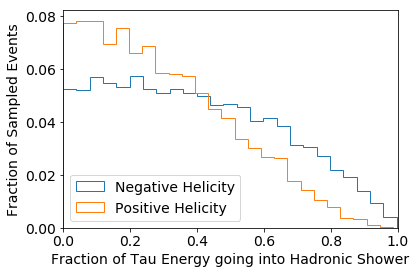

In [15]:
rcParams['font.size']=14
figure()
ret = hist(neg_em_energy_fractions,25,histtype='step',label='Negative Helicity',
           weights=np.ones(len(neg_em_energy_fractions))/float(len(neg_em_energy_fractions)))
ret = hist(pos_em_energy_fractions,25,histtype='step',label='Positive Helicity',
           weights=np.ones(len(pos_em_energy_fractions))/float(len(pos_em_energy_fractions)))

plt.xlim(0,1)
plt.legend(loc='lower left')
plt.ylabel(r"Fraction of Sampled Events")
plt.xlabel(r"Fraction of Tau Energy going into Hadronic Shower")
plt.title("")

Text(0.5,1,'')

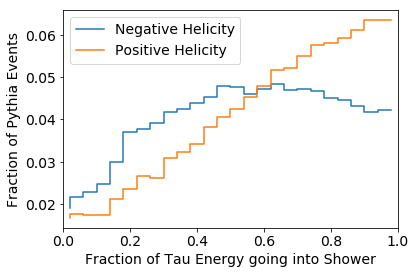

In [16]:
figure()
bins, weights = TDS_n.energy_fraction(type='shower',rebin_factor=400)
plt.step(bins, weights,label='Negative Helicity',)
bins, weights = TDS_p.energy_fraction(type='shower',rebin_factor=400)
plt.step(bins, weights,label='Positive Helicity',)
plt.xlim(0,1)
plt.legend(loc='upper left')
plt.ylabel(r"Fraction of Pythia Events")
plt.xlabel(r"Fraction of Tau Energy going into Shower")
plt.title("")

Text(0.5,1,'')

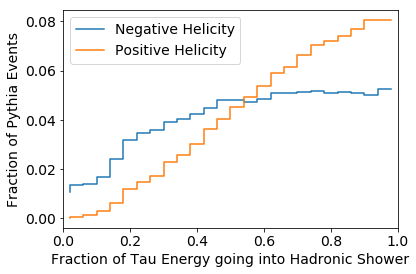

In [17]:
figure()
bins, weights = TDS_n.energy_fraction(type='hadron',rebin_factor=400)
plt.step(bins, weights,label='Negative Helicity',)
bins, weights = TDS_p.energy_fraction(type='hadron',rebin_factor=400)
plt.step(bins, weights,label='Positive Helicity',)
plt.xlim(0,1)
plt.legend(loc='upper left')
plt.ylabel(r"Fraction of Pythia Events")
plt.xlabel(r"Fraction of Tau Energy going into Hadronic Shower")
plt.title("")

Text(0.5,1,'')

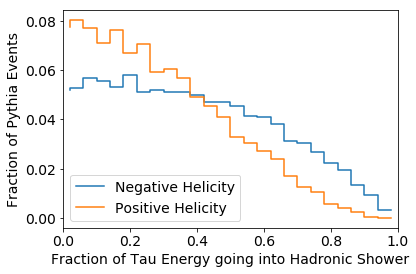

In [18]:
figure()
bins, weights = TDS_n.energy_fraction(type='em',rebin_factor=400)
plt.step(bins, weights,label='Negative Helicity',)
bins, weights = TDS_p.energy_fraction(type='em',rebin_factor=400)
plt.step(bins, weights,label='Positive Helicity',)
plt.xlim(0,1)
plt.legend(loc='lower left')
plt.ylabel(r"Fraction of Pythia Events")
plt.xlabel(r"Fraction of Tau Energy going into Hadronic Shower")
plt.title("")